In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.stats import skew
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Q1

In [5]:
csv_data = pd.read_csv('train.csv', header = 0 )  

In [6]:
numDF = pd.DataFrame(csv_data[[ "LotArea", "GrLivArea", "TotalBsmtSF", "GarageArea"]])

In [7]:
numDF.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137
std,9981.264932,525.480383,438.705324,213.804841
min,1300.000000,334.000000,0.000000,0.000000
25%,7553.500000,1129.500000,795.750000,334.500000
50%,9478.500000,1464.000000,991.500000,480.000000
75%,11601.500000,1776.750000,1298.250000,576.000000
max,215245.000000,5642.000000,6110.000000,1418.000000


In [8]:
LotArea = pd.DataFrame(csv_data['LotArea'])
GrLivArea = pd.DataFrame(csv_data['GrLivArea'])
TotalBsmtSF = pd.DataFrame(csv_data['TotalBsmtSF'])
GarageArea = pd.DataFrame(csv_data['GarageArea'])
SalePrice = pd.DataFrame(csv_data['SalePrice'])

<Axes: >

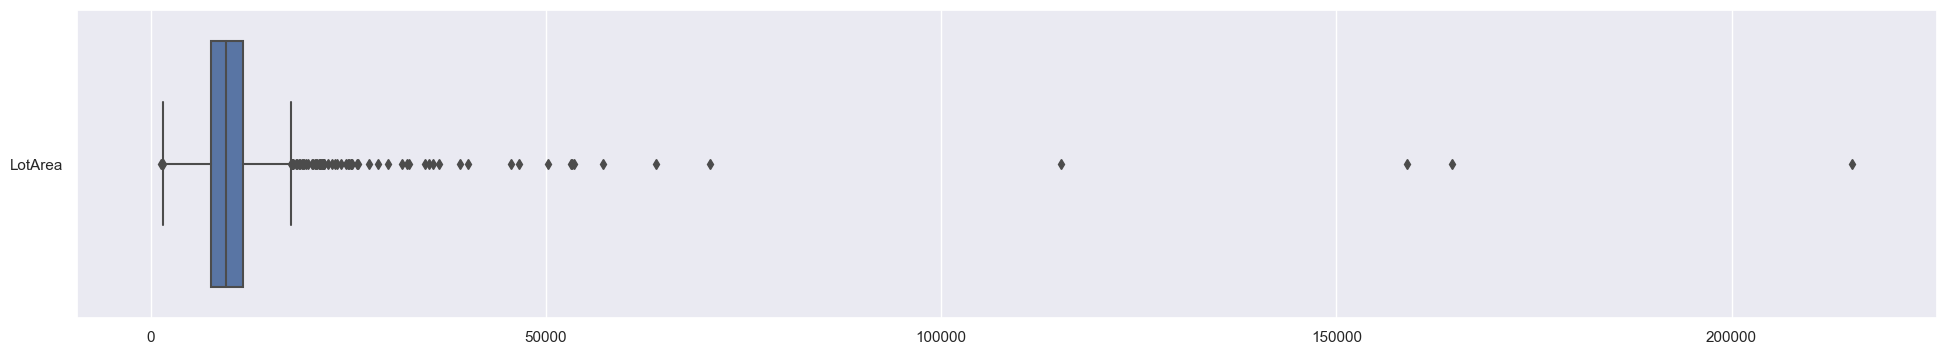

In [9]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = LotArea, orient = "h")

In [10]:
Q1 = numDF['LotArea'].quantile(0.25)
Q3 = numDF['LotArea'].quantile(0.75)
IQR = Q3 - Q1

outliers = (numDF['LotArea'] < (Q1 - 1.5 * IQR)) | (numDF['LotArea'] > (Q3 + 1.5 * IQR))
number_of_outliers = outliers.sum()

print(f"Number of outliers in 'LotArea': {number_of_outliers}")

Number of outliers in 'LotArea': 69


<Axes: >

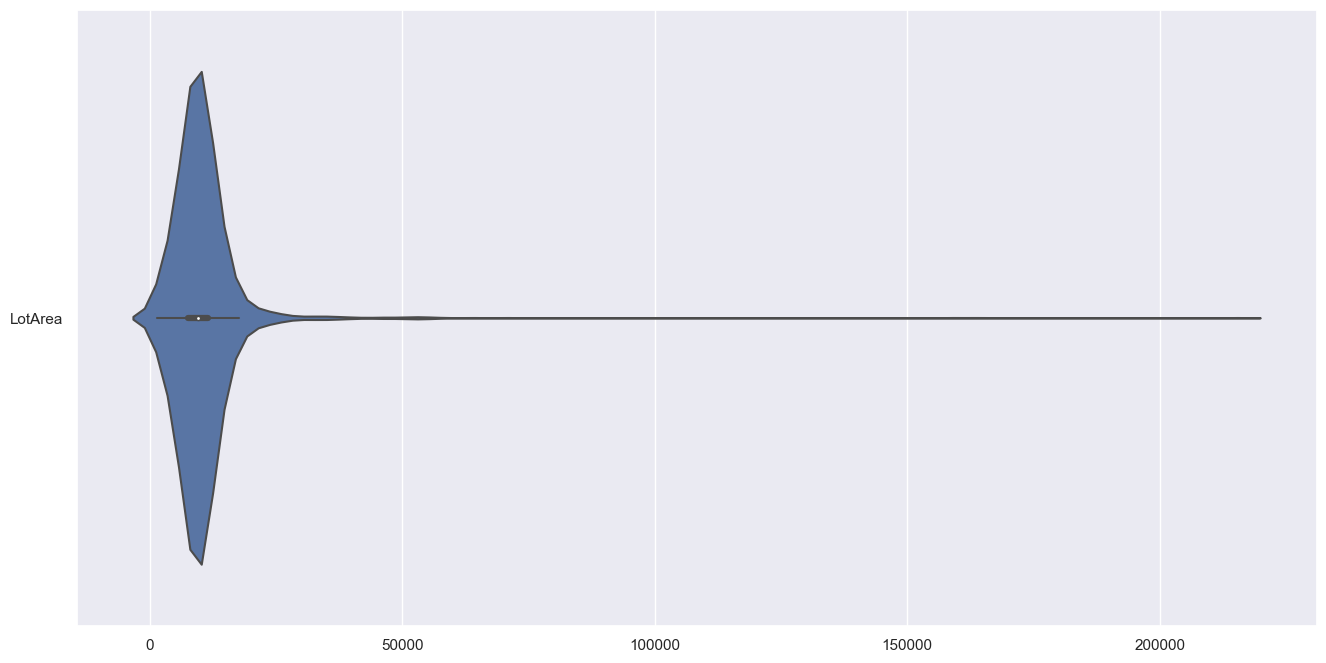

In [11]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = LotArea, orient = "h")

In [23]:


skewness = skew(numDF['LotArea'])
print(f"Skewness of the column: {skewness}")

Skewness of the column: 12.195142125084478


<Axes: >

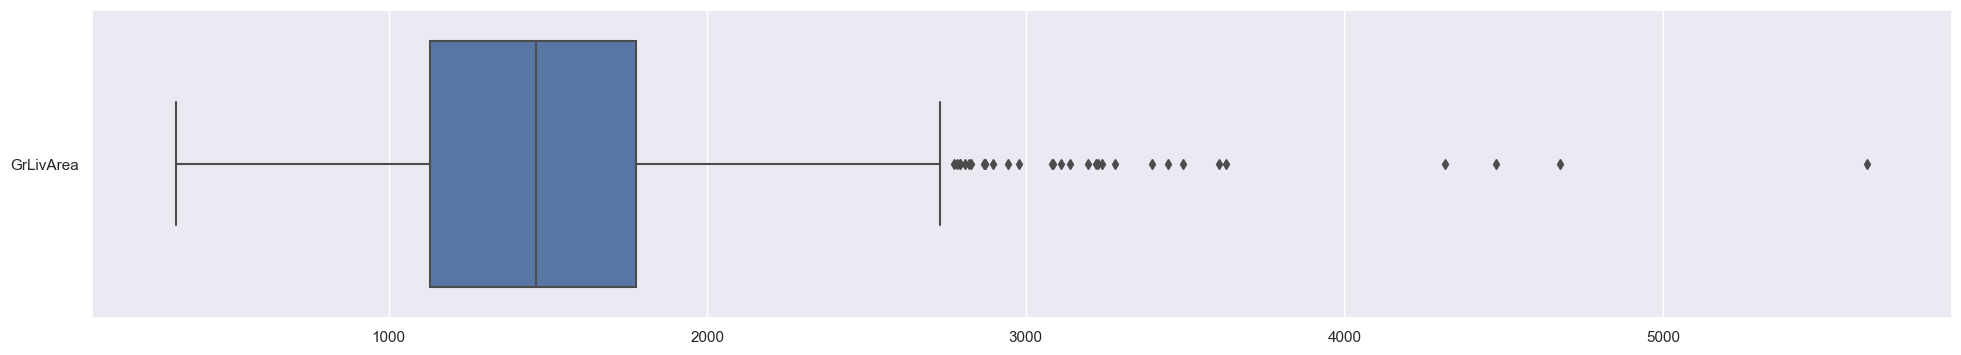

In [12]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = GrLivArea, orient = "h")

In [33]:
Q1 = numDF['GrLivArea'].quantile(0.25)
Q3 = numDF['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1

outliers = (numDF['GrLivArea'] < (Q1 - 1.5 * IQR)) | (numDF['GrLivArea'] > (Q3 + 1.5 * IQR))
number_of_outliers = outliers.sum()

print(f"Number of outliers in 'GrLivArea': {number_of_outliers}")

Number of outliers in 'GrLivArea': 31


<Axes: >

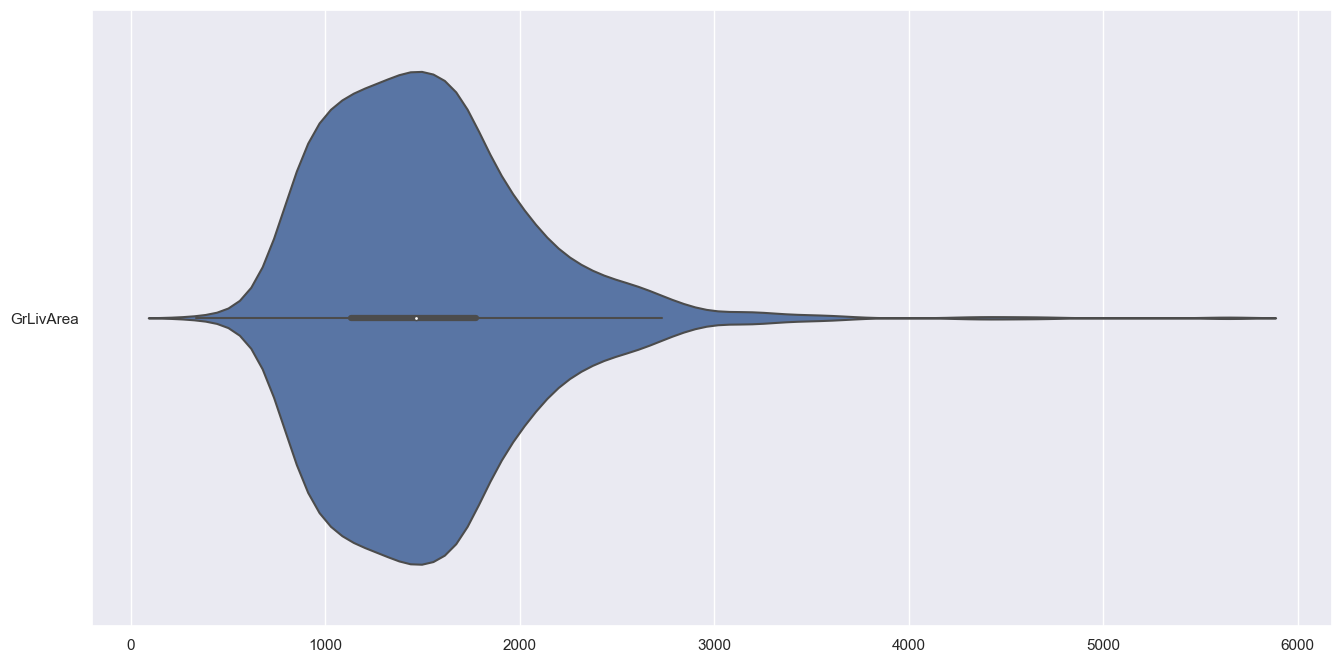

In [12]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = GrLivArea, orient = "h")

In [24]:


skewness = skew(numDF['GrLivArea'])
print(f"Skewness of the column: {skewness}")

Skewness of the column: 1.365155954773434


<Axes: >

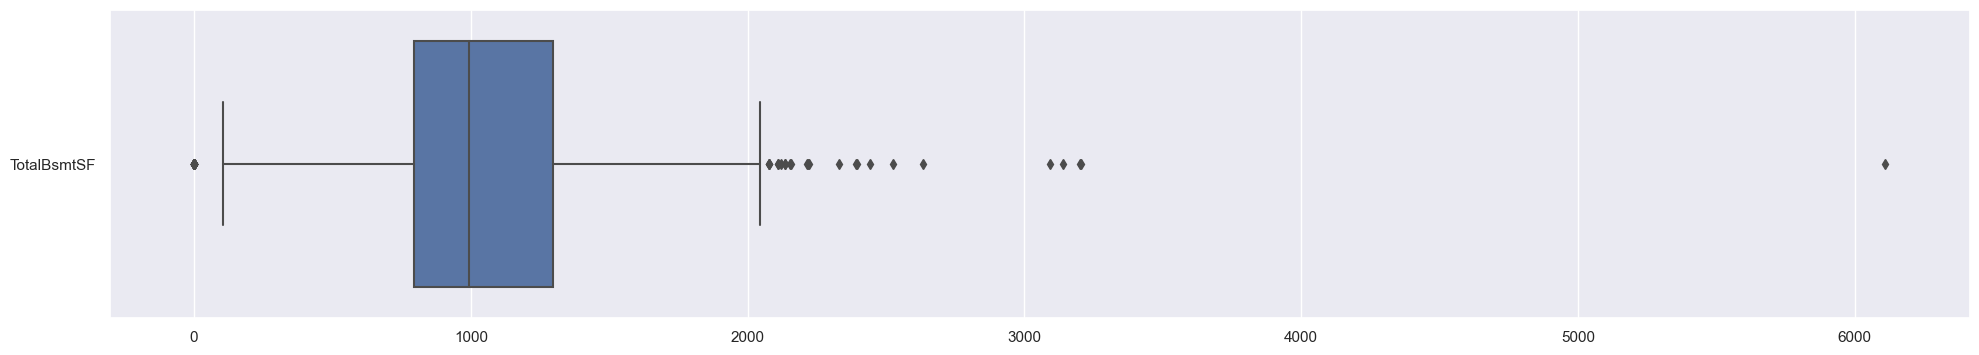

In [14]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = TotalBsmtSF, orient = "h")

In [34]:
Q1 = numDF['TotalBsmtSF'].quantile(0.25)
Q3 = numDF['TotalBsmtSF'].quantile(0.75)
IQR = Q3 - Q1

outliers = (numDF['TotalBsmtSF'] < (Q1 - 1.5 * IQR)) | (numDF['TotalBsmtSF'] > (Q3 + 1.5 * IQR))
number_of_outliers = outliers.sum()

print(f"Number of outliers in 'TotalBsmtSF': {number_of_outliers}")

Number of outliers in 'TotalBsmtSF': 61


<Axes: >

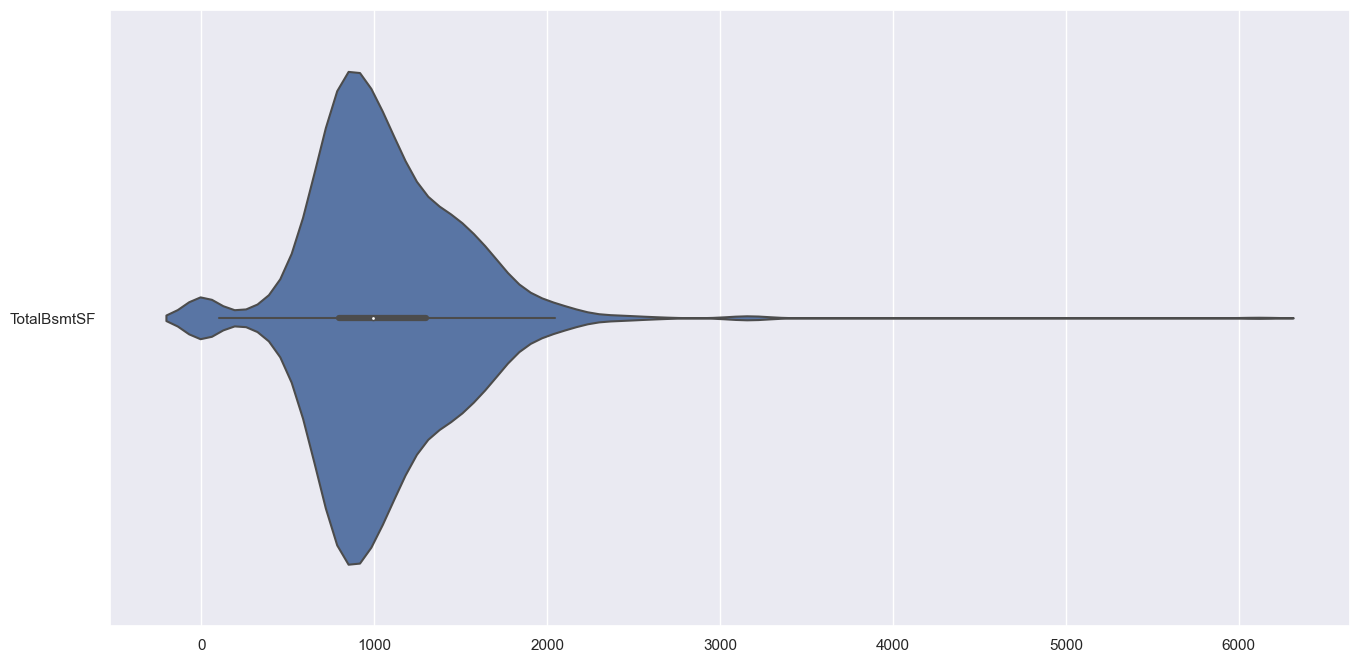

In [13]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = TotalBsmtSF, orient = "h")

In [25]:


skewness = skew(numDF['TotalBsmtSF'])
print(f"Skewness of the column: {skewness}")

Skewness of the column: 1.522688086978629


<Axes: >

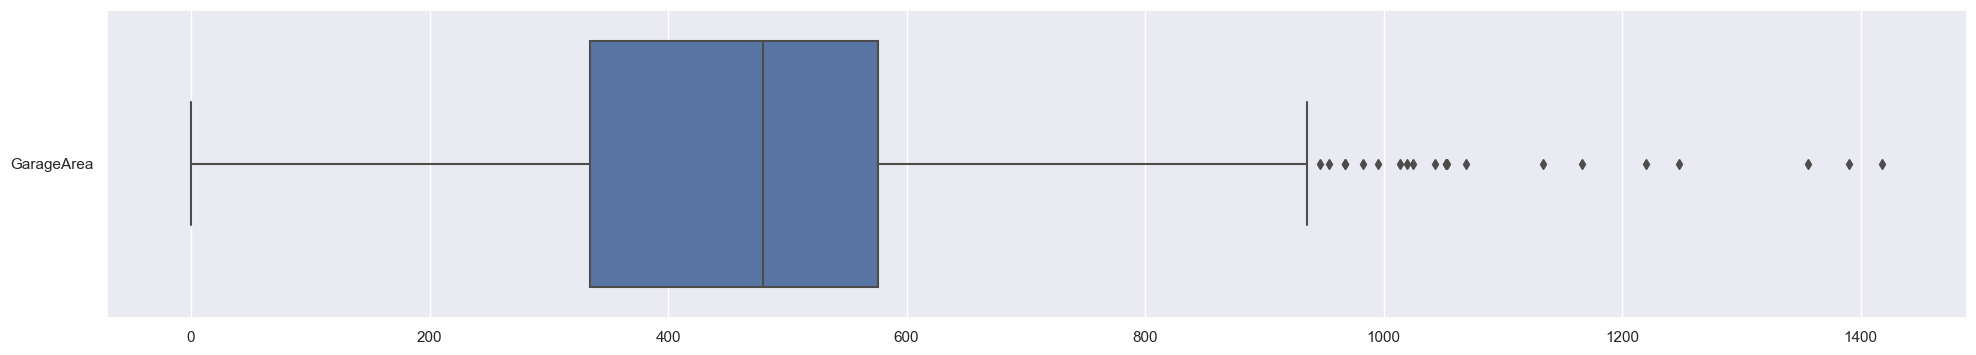

In [15]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data =GarageArea , orient = "h")

In [35]:
Q1 = numDF['GarageArea'].quantile(0.25)
Q3 = numDF['GarageArea'].quantile(0.75)
IQR = Q3 - Q1

outliers = (numDF['GarageArea'] < (Q1 - 1.5 * IQR)) | (numDF['GarageArea'] > (Q3 + 1.5 * IQR))
number_of_outliers = outliers.sum()

print(f"Number of outliers in 'GarageArea': {number_of_outliers}")

Number of outliers in 'GarageArea': 21


<Axes: >

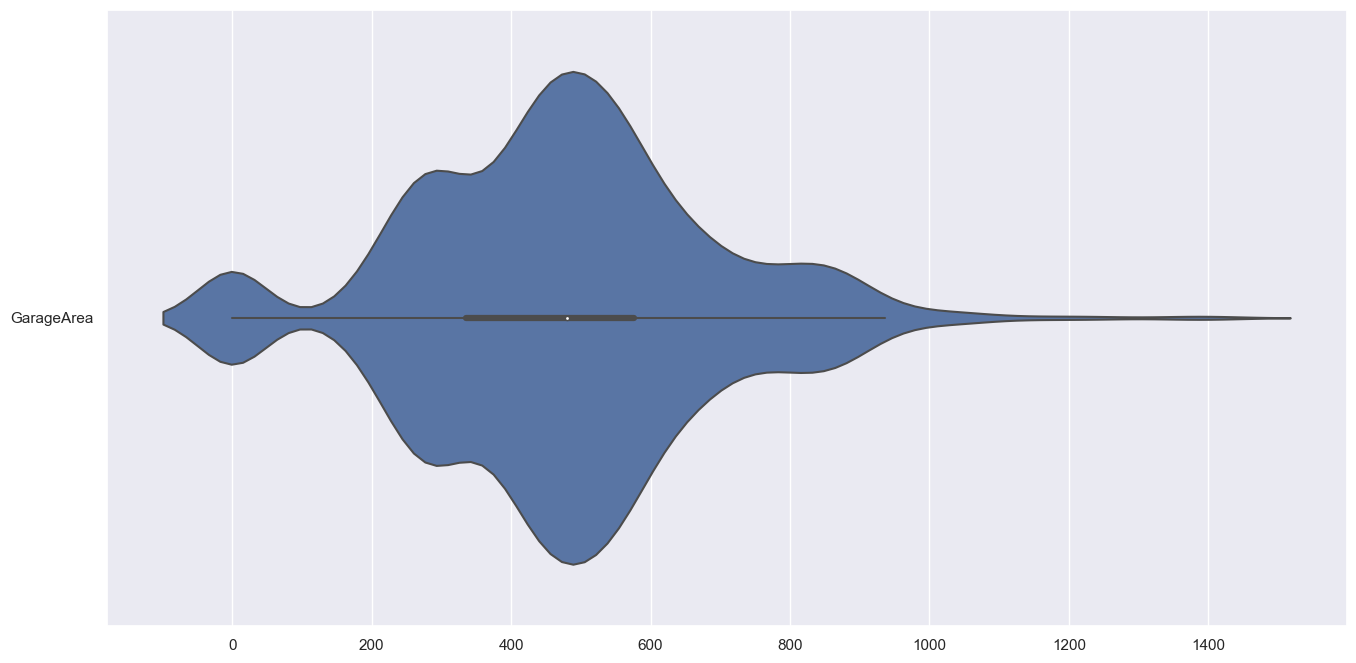

In [14]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = GarageArea, orient = "h")

In [26]:


skewness = skew(numDF['GarageArea'])
print(f"Skewness of the column: {skewness}")

Skewness of the column: 0.1797959420587727


# Q1a) LotArea has the maximum number of outliers as per box-plot. It has 69 outliers.
# Q1b) LotArea is the most skewed from a regular normal distribution as it has the highest absolute skewness. Based on the violin plot, LotArea has the longest graph and it has the largest difference between its mean and median.The skew is positive.

In [29]:
jointDF = pd.concat([LotArea, SalePrice], axis = 1).reindex(LotArea.index)
jointDF.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


In [30]:
jointDF = pd.concat([GrLivArea, SalePrice], axis = 1).reindex(LotArea.index)
jointDF.corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


In [31]:
jointDF = pd.concat([TotalBsmtSF, SalePrice], axis = 1).reindex(LotArea.index)
jointDF.corr()

,TotalBsmtSF,SalePrice
TotalBsmtSF,1.000000,0.613581
SalePrice,0.613581,1.000000


In [32]:
jointDF = pd.concat([GarageArea, SalePrice], axis = 1).reindex(LotArea.index)
jointDF.corr()

,GarageArea,SalePrice
GarageArea,1.000000,0.623431
SalePrice,0.623431,1.000000


# Q1c) GrLivArea and GarageArea are the top 2 variables that will help us the most in predicting ‘SalePrice’ of houses in this data because they have the top 2 strongest relationship between Saleprice based on the correlation I found.

# Q2

In [34]:

MSSubClass = pd.DataFrame(csv_data['MSSubClass'])
Neighborhood = pd.DataFrame(csv_data['Neighborhood'])
BldgType = pd.DataFrame(csv_data['BldgType'])
OverallQual= pd.DataFrame(csv_data['OverallQual'])


In [37]:
print("Number of levels :", len(csv_data["MSSubClass"].unique()))
print(csv_data["MSSubClass"].value_counts())

Number of levels : 15
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


In [38]:
print("Number of levels :", len(csv_data["Neighborhood"].unique()))
print(csv_data["Neighborhood"].value_counts())

Number of levels : 25
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


In [39]:
print("Number of levels :", len(csv_data["BldgType"].unique()))
print(csv_data["BldgType"].value_counts())

Number of levels : 5
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


In [40]:
print("Number of levels :", len(csv_data["OverallQual"].unique()))
print(csv_data["OverallQual"].value_counts())

Number of levels : 10
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


# Q2a) Neighborhood has the highest number of levels of 25. 1Fam has the highest number of houses of 1220.

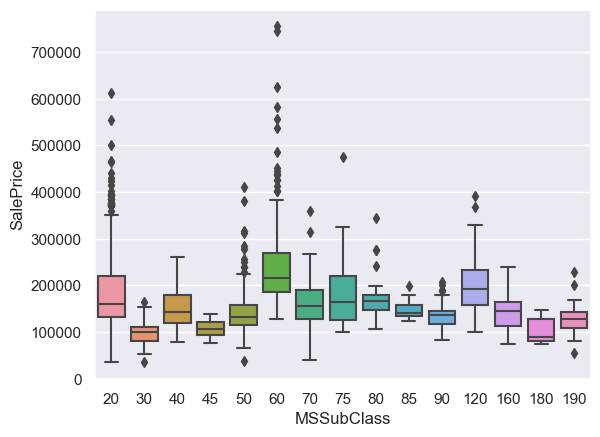

In [45]:
data = pd.DataFrame(csv_data[[ "MSSubClass", "SalePrice"]])

# Create a box plot
sb.boxplot(x="MSSubClass", y="SalePrice", data=data)

# Set labels and title
plt.xlabel("MSSubClass")
plt.ylabel("SalePrice")


# Show the plot
plt.show()

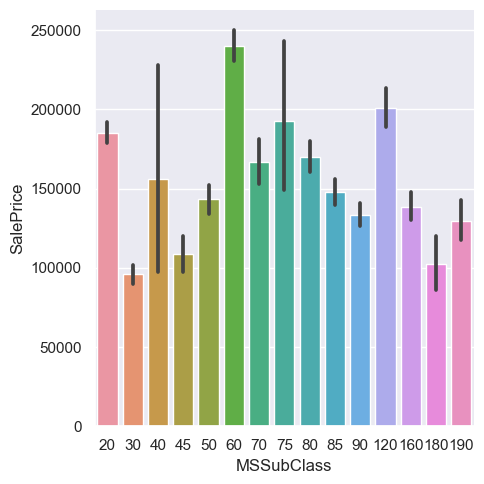

In [34]:
data = pd.DataFrame(csv_data[["MSSubClass", "SalePrice"]])

# Use catplot instead of boxplot
sb.catplot(x="MSSubClass", y="SalePrice", data=data, kind="bar")

# Set labels
plt.xlabel("MSSubClass")
plt.ylabel("SalePrice")

# Show the plot
plt.show()

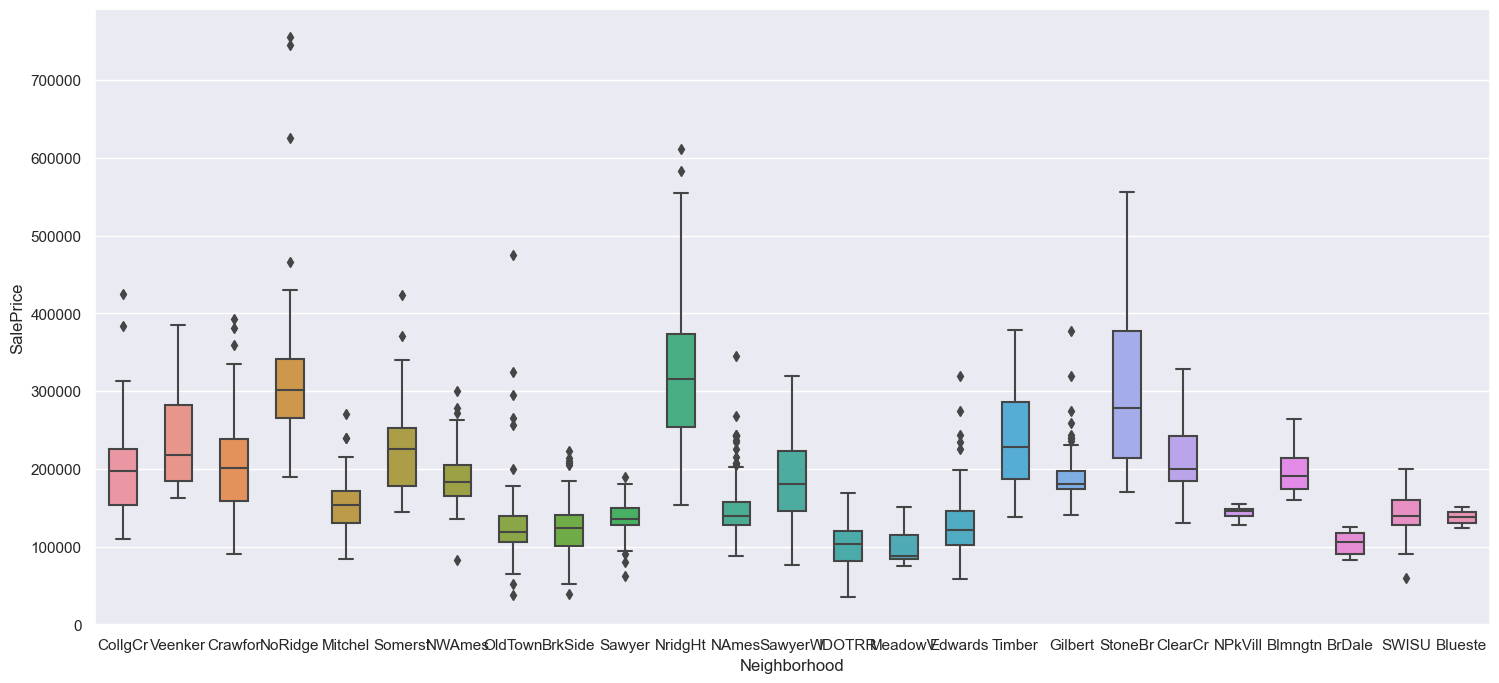

In [19]:
data = pd.DataFrame(csv_data[[ "Neighborhood", "SalePrice"]])
f = plt.figure(figsize=(18, 8))

sb.boxplot(x="Neighborhood", y="SalePrice", data=data, width = 0.5)


plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")



plt.show()

<Figure size 2400x2000 with 0 Axes>

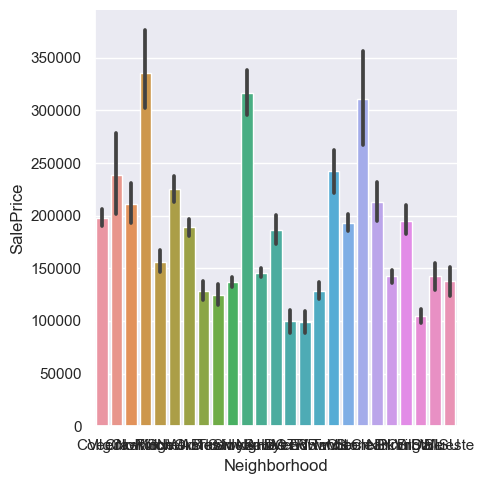

In [38]:
data = pd.DataFrame(csv_data[["Neighborhood", "SalePrice"]])
f = plt.figure(figsize=(24, 20))
# Use catplot instead of boxplot
sb.catplot(x="Neighborhood", y="SalePrice", data=data, kind="bar")

# Set labels
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")

# Show the plot
plt.show()

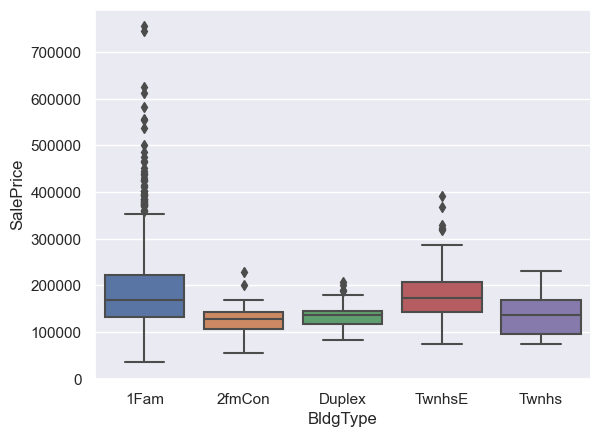

In [20]:
data = pd.DataFrame(csv_data[[ "BldgType", "SalePrice"]])


sb.boxplot(x="BldgType", y="SalePrice", data=data)


plt.xlabel("BldgType")
plt.ylabel("SalePrice")



plt.show()

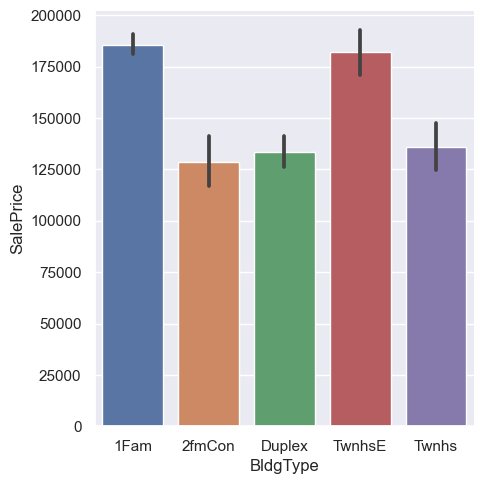

In [29]:
data = pd.DataFrame(csv_data[["BldgType", "SalePrice"]])

# Use catplot instead of boxplot
sb.catplot(x="BldgType", y="SalePrice", data=data, kind="bar")

# Set labels
plt.xlabel("BldgType")
plt.ylabel("SalePrice")

# Show the plot
plt.show()

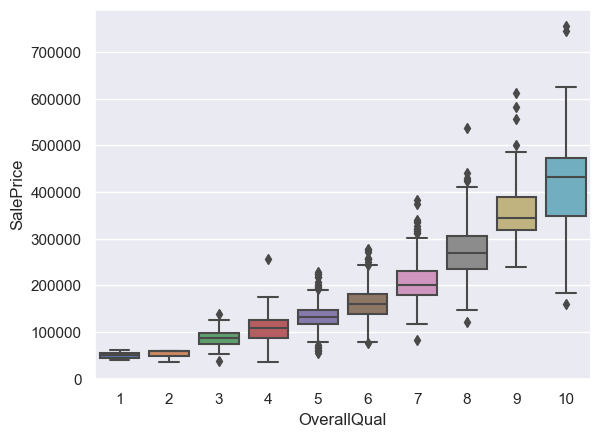

In [21]:
data = pd.DataFrame(csv_data[[ "OverallQual", "SalePrice"]])

sb.boxplot(x="OverallQual", y="SalePrice", data=data)


plt.xlabel("OverallQual")
plt.ylabel("SalePrice")



plt.show()

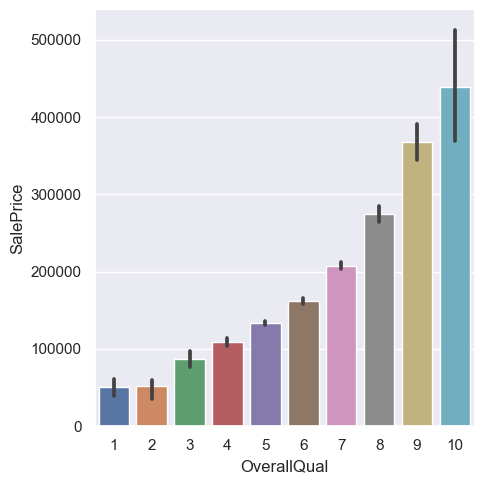

In [28]:
data = pd.DataFrame(csv_data[["OverallQual", "SalePrice"]])

# Use catplot instead of boxplot
sb.catplot(x="OverallQual", y="SalePrice", data=data, kind="bar")

# Set labels
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

# Show the plot
plt.show()

# Q2b OverallQual and Neighborhood helps the most in predicting ‘SalePrice’ of houses in this data. Based on the box plot, as OverallQual increases, SalePrice also increases. From the catplot, there are 3 areas in Neighborhood that result in a very high SalePrice which may imply that houses in these 3 areas will have a high SalePrice compared to other areas.

# Q3a

In [54]:
garagetype=pd.DataFrame(csv_data[[ "GarageType"]])
price = pd.DataFrame(csv_data[["SalePrice"]])
jointDF = pd.concat([garagetype,price], axis = 1).reindex(price.index)
jointDF

,GarageType,SalePrice
0,Attchd,208500
1,Attchd,181500
2,Attchd,223500
3,Detchd,140000
4,Attchd,250000
...,...,...
1455,Attchd,175000
1456,Attchd,210000
1457,Attchd,266500
1458,Attchd,142125


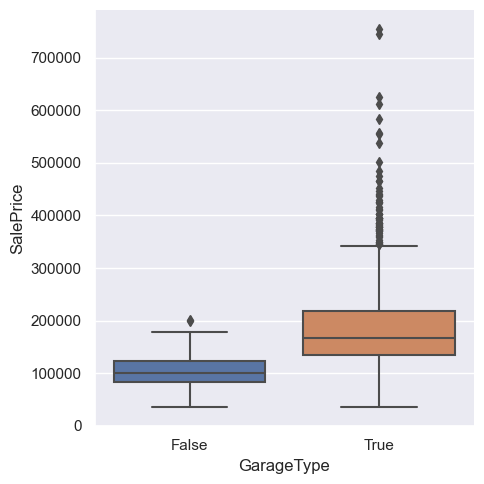

In [55]:
data = csv_data["GarageType"].notna()
data = pd.concat([data, csv_data["SalePrice"]], axis = 1)
sb.catplot(x="GarageType", y="SalePrice",kind="box",data=data)

# The SalePrice of a house gets affected by whether it has a Garage or not because based on the boxplot, when there is a garage, the price will be higher compared to when there is not a garage.